In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import VarianceThreshold
import sys
sys.path.append("../")
from Modules import ds_functions as ds

Using TensorFlow backend.


### No missing values or outliers

## Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

data: pd.DataFrame = pd.read_csv('../CD databases/heart_failure_clinical_records_dataset.csv')
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels = pd.unique(y)

sc = StandardScaler()
X = sc.fit_transform(X)

## Balancing

Best accuracy: 0.81  with  RandomOverSampler


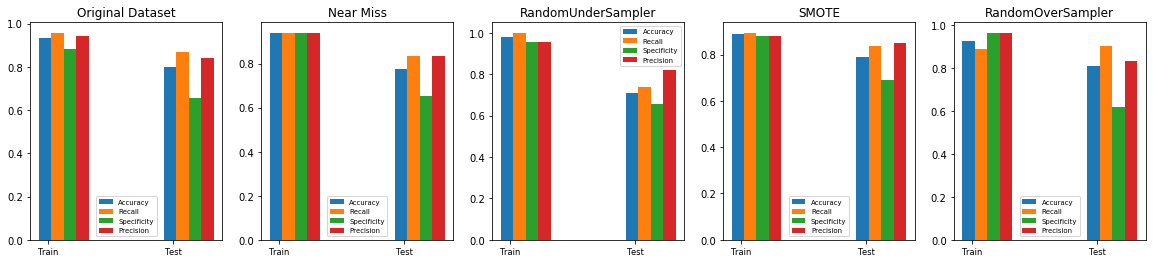

In [18]:
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
trnX1, trnY1 = trnX, trnY

clf = DecisionTreeClassifier(min_samples_leaf=1, max_depth=10, criterion='gini', min_impurity_decrease=0.01)

nm = NearMiss()
rus = RandomUnderSampler(random_state=42)
sm = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=42)

best = [0,0]
values = []
titles = ['Original Dataset', 'Near Miss', 'RandomUnderSampler', 'SMOTE', 'RandomOverSampler']
samp = [nm, rus, sm, ros, ros]

for i in range(5):
    clf.fit(trnX1, trnY1)
    prd_trn = clf.predict(trnX1)
    prd_tst = clf.predict(tstX)
    
    values.append([trnY1, prd_trn, tstY, prd_tst, titles[i]])
    if best[0] < metrics.accuracy_score(tstY, prd_tst):
        best[0] = metrics.accuracy_score(tstY, prd_tst)
        best[1] = titles[i]
    
    trnX1, trnY1 = samp[i].fit_resample(trnX, trnY)

print ('Best accuracy: %1.2f ' %(best[0]), 'with ', best[1])
    
ds.plot_compare_results(pd.unique(y), values, len(values))

## Feature Selection

Best accuracy: 0.88  with  Chi-square(8)


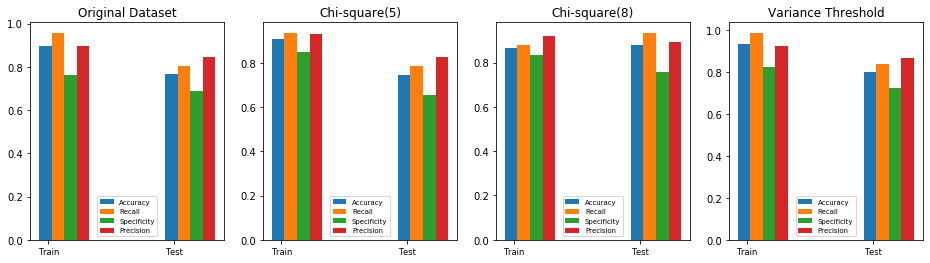

In [10]:
data: pd.DataFrame = pd.read_csv('../CD databases/heart_failure_clinical_records_dataset.csv')
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels = pd.unique(y)

clf = DecisionTreeClassifier(min_samples_leaf=1, max_depth=10, criterion='gini', min_impurity_decrease=0.01)

X_best_vars_5 = SelectKBest(chi2, k=5).fit_transform(X, y)
X_best_vars_8 = SelectKBest(chi2, k=8).fit_transform(X, y)

th = VarianceThreshold(threshold=0.8)
X_high_variance = th.fit_transform(data)

best = [0,0]
values = []
titles = ['Original Dataset', 'Chi-square(5)', 'Chi-square(8)', 'Variance Threshold']
X_values = [X, X_best_vars_5, X_best_vars_8, X_high_variance]

for i in range(4):
    trnX, tstX, trnY, tstY = train_test_split(X_values[i], y, train_size=0.7, stratify=y)
    
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    
    values.append([trnY, prd_trn, tstY, prd_tst, titles[i]])
    if best[0] < metrics.accuracy_score(tstY, prd_tst):
        best[0] = metrics.accuracy_score(tstY, prd_tst)
        best[1] = titles[i]

print ('Best accuracy: %1.2f ' %(best[0]), 'with ', best[1])
    
ds.plot_compare_results(pd.unique(y), values, len(values))

## Balance & feature select (chi-square & RandomOverSampler)

Best accuracy: 0.82  with  RandomOverSampler vs chi-sq(8)


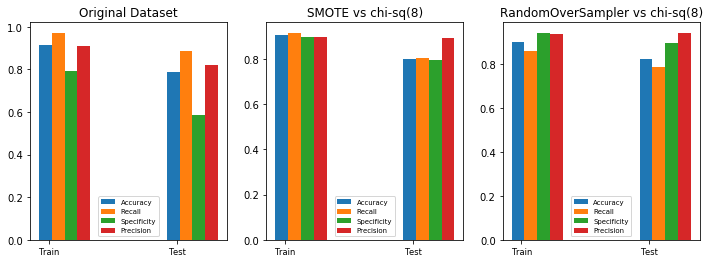

In [21]:
data: pd.DataFrame = pd.read_csv('../CD databases/heart_failure_clinical_records_dataset.csv')
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels = pd.unique(y)

X_best_vars_8 = SelectKBest(chi2, k=8).fit_transform(X, y)
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)


clf = DecisionTreeClassifier(min_samples_leaf=1, max_depth=10, criterion='gini', min_impurity_decrease=0.01)
sm = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=42)

best = [0,0]
values = []
titles = ['Original Dataset', 'SMOTE vs chi-sq(8)', 'RandomOverSampler vs chi-sq(8)']
samp = [sm, ros, ros]

for i in range(3):
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)

    values.append([trnY, prd_trn, tstY, prd_tst, titles[i]])
    if best[0] < metrics.accuracy_score(tstY, prd_tst):
        best[0] = metrics.accuracy_score(tstY, prd_tst)
        best[1] = titles[i]
    trnX, tstX, trnY, tstY = train_test_split(X_best_vars_5, y, train_size=0.7, stratify=y)
    
    trnX, trnY = samp[i].fit_resample(trnX, trnY)

print ('Best accuracy: %1.2f ' %(best[0]), 'with ', best[1])

ds.plot_compare_results(pd.unique(y), values, len(values))